# Weighted Average Recommendation System

Dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [1]:
import pandas as pd
import numpy as np

In [2]:
credits=pd.read_csv("tmdb_5000_credits.csv")
movies=pd.read_csv("tmdb_5000_movies.csv")

In [3]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
print("credits_df:",credits.shape)
print("movies_df:",movies.shape)

credits_df: (4803, 4)
movies_df: (4803, 20)


Rename the column movie_id as id in credits dataframe

Merge movies and credits dataframes on id column

In [6]:
column_renamed_credits_df=credits.rename(columns={'movie_id':'id'})
merged_df=movies.merge(column_renamed_credits_df,on='id')
merged_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

Get rid of columns which are not usefull in building recommendation system

In [7]:
df=merged_df.drop(columns=['homepage', 'production_companies','production_countries', 'status', 'title_x', 'title_y'],axis=1)

In [8]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew'],
      dtype='object')

In [9]:
df.isnull().sum()

budget                 0
genres                 0
id                     0
keywords               0
original_language      0
original_title         0
overview               3
popularity             0
release_date           1
revenue                0
runtime                2
spoken_languages       0
tagline              844
vote_average           0
vote_count             0
cast                   0
crew                   0
dtype: int64

In [10]:
df.shape

(4803, 17)

Drop the null values

In [11]:
df1=df.dropna()

In [12]:
df1.reset_index(inplace=True)

In [13]:
df1.shape

(3959, 18)

In [14]:
df1.isnull().sum()

index                0
budget               0
genres               0
id                   0
keywords             0
original_language    0
original_title       0
overview             0
popularity           0
release_date         0
revenue              0
runtime              0
spoken_languages     0
tagline              0
vote_average         0
vote_count           0
cast                 0
crew                 0
dtype: int64

Add the Weighted average metric as column to the df1

Formula to calculate the Weighted average metric is given by(Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_page)


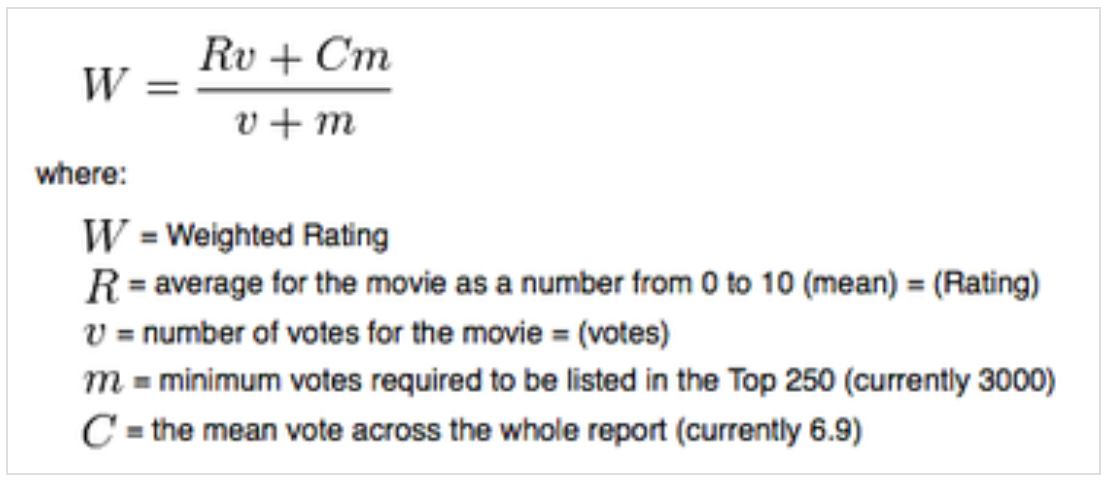

In [15]:
df1.columns

Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew'],
      dtype='object')

In [16]:
R=df1['vote_average']
v=df1['vote_count']
m=df1['vote_count'].quantile(0.70)
C=df1['vote_average'].mean()
df1['weighted_average']=((R*v)+(C*m))/(v+m)

<ipython-input-16-72aabd980488>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['weighted_average']=((R*v)+(C*m))/(v+m)


In [17]:
df1.columns

Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'weighted_average'],
      dtype='object')

In [18]:
sorted_acc_weighted_average=df1.sort_values('weighted_average',ascending=False)
sorted_acc_weighted_average[['original_title','popularity', 'vote_average', 'vote_count','weighted_average']]

,original_title,popularity,vote_average,vote_count,weighted_average
1770,The Shawshank Redemption,136.747729,8.5,8205,8.312997
2972,The Godfather,143.659698,8.4,5893,8.158505
644,Fight Club,146.757391,8.3,9413,8.149501
2889,Pulp Fiction,121.463076,8.3,8428,8.133297
63,The Dark Knight,187.322927,8.2,12002,8.085788
...,...,...,...,...,...
295,Catwoman,32.271938,4.2,808,5.133898
3280,The Boy Next Door,24.161735,4.1,1022,4.960503
1564,Dragonball Evolution,21.677732,2.9,462,4.899151
204,Batman & Robin,50.073575,4.2,1418,4.867445


Lets plot the top 5 movies according to the weighted average votes

Text(0, 0.5, 'Movie title')

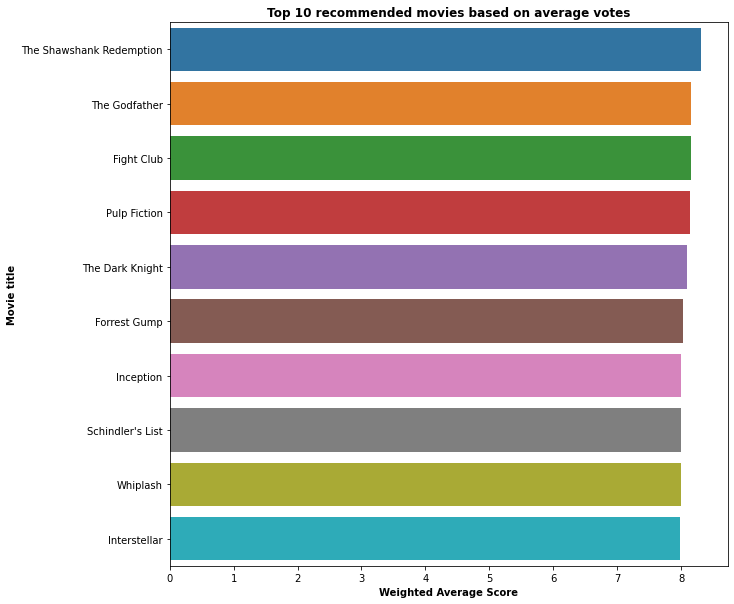

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.barplot(x=sorted_acc_weighted_average['weighted_average'].head(10),y=sorted_acc_weighted_average['original_title'].head(10),data=sorted_acc_weighted_average)
#plt.xlim(0,10)
plt.title('Top 10 recommended movies based on average votes',weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie title',weight='bold')
#plt.savefig('Top 10 Recommended movies.png')


Lets plot the top 5 movies according to the popularity score

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sorted_acc_popularity=df1.sort_values('popularity',ascending=False)
sorted_acc_popularity[['original_title','popularity', 'vote_average', 'vote_count','weighted_average']]

,original_title,popularity,vote_average,vote_count,weighted_average
531,Minions,875.581305,6.4,4571,6.370326
91,Interstellar,724.247784,8.1,10867,7.980814
765,Deadpool,514.569956,7.4,10995,7.325138
90,Guardians of the Galaxy,481.098624,7.9,9742,7.781762
123,Mad Max: Fury Road,434.278564,7.2,9427,7.127762
...,...,...,...,...,...
3670,Down & Out With The Dolls,0.002386,0.0,0,6.181940
3799,Love Letters,0.001586,4.6,4,6.173200
3859,Midnight Cabaret,0.001389,0.0,0,6.181940
3914,Penitentiary,0.001117,4.9,8,6.167853


In [21]:
sorted_acc_popularity.columns

Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'weighted_average'],
      dtype='object')

Text(0, 0.5, 'Movie Title')

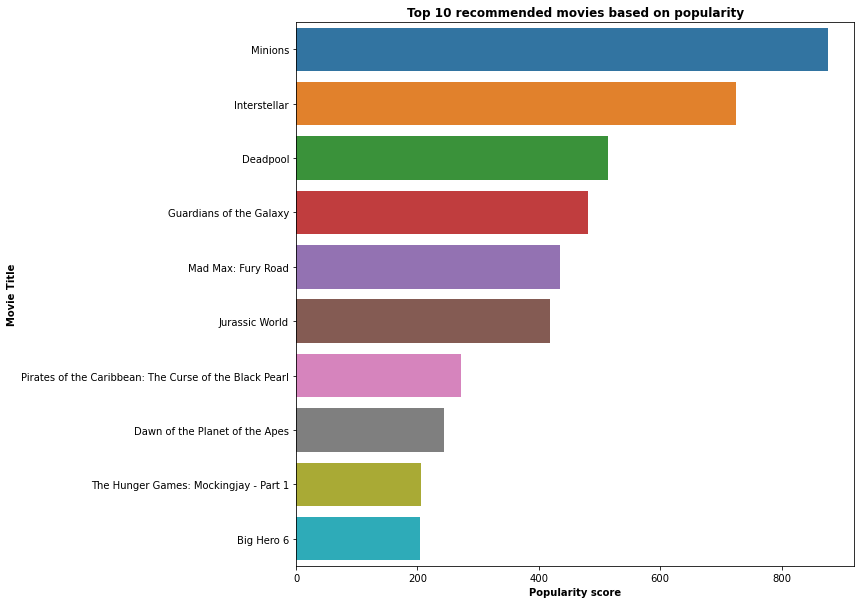

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_acc_popularity['popularity'].head(10),y=sorted_acc_popularity['original_title'].head(10),data=sorted_acc_popularity)
plt.title('Top 10 recommended movies based on popularity',weight='bold')
plt.xlabel('Popularity score',weight='bold')
plt.ylabel('Movie Title',weight='bold')
#plt.savefig('Top 10 recommended movies.png')

Recommendation using both popularity and weighted average with equal importance to both metrics

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
df1.columns

Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'weighted_average'],
      dtype='object')

In [25]:
df1[['weighted_average','popularity']]

,weighted_average,popularity
0,7.141453,150.437577
1,6.800957,139.082615
2,6.283609,107.376788
3,7.496092,112.312950
4,6.120744,43.926995
...,...,...
3954,6.181688,0.918116
3955,6.524816,23.307949
3956,6.285800,14.269792
3957,6.179995,0.642552


In [26]:
scaler=MinMaxScaler()
normalized_metrics=scaler.fit_transform(df1[['weighted_average','popularity']])
normalized_metrics_df=pd.DataFrame(normalized_metrics,columns=['Normalized_WAV','Normalized_popularity'])
normalized_metrics_df

,Normalized_WAV,Normalized_popularity
0,0.663837,0.171814
1,0.566135,0.158846
2,0.417687,0.122634
3,0.765597,0.128272
4,0.370954,0.050169
...,...,...
3954,0.388442,0.001048
3955,0.486899,0.026620
3956,0.418316,0.016297
3957,0.387956,0.000733


In [27]:
normalized_metrics_df.isnull().sum()

Normalized_WAV           0
Normalized_popularity    0
dtype: int64

In [28]:
normalized_metrics_df.shape

(3959, 2)

In [29]:
df1.shape

(3959, 19)

In [30]:
df2=pd.concat([df1,normalized_metrics_df],axis=1)

In [31]:
df2.columns

Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'weighted_average', 'Normalized_WAV',
       'Normalized_popularity'],
      dtype='object')

In [32]:
df2['score']=df2['Normalized_WAV']*0.5+df2['Normalized_popularity']*0.5

In [33]:
df2.columns

Index(['index', 'budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'release_date', 'revenue',
       'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count',
       'cast', 'crew', 'weighted_average', 'Normalized_WAV',
       'Normalized_popularity', 'score'],
      dtype='object')

In [34]:
sorted_acc_score=df2.sort_values('score',ascending=False)

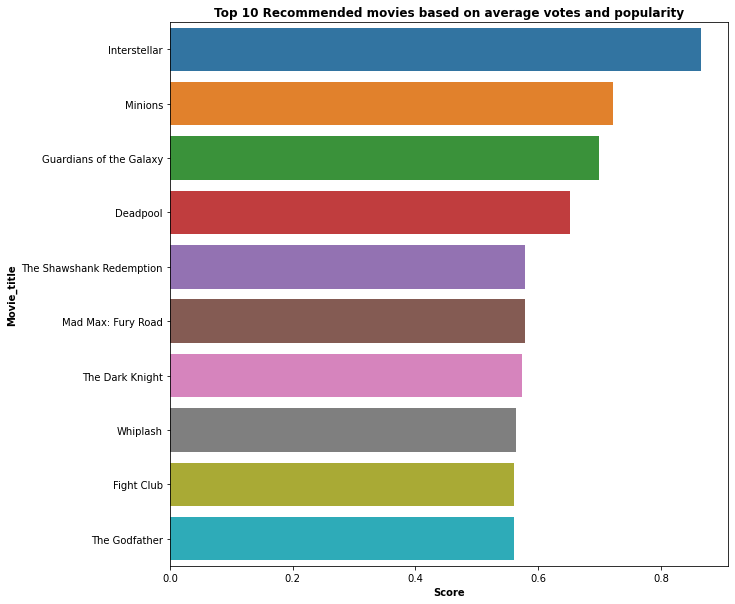

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(x=sorted_acc_score['score'].head(10),y=sorted_acc_score[ 'original_title'].head(10),data=sorted_acc_score)
plt.title('Top 10 Recommended movies based on average votes and popularity',weight='bold')
plt.xlabel('Score',weight='bold')
plt.ylabel('Movie_title',weight='bold')
plt.savefig('Best_movies.png')